In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Toy dataset: y = 2x + 1
# -----------------------
x = np.linspace(-1, 1, 200).reshape(-1, 1)   # (N,1)
y = 2 * x + 1                                # (N,1)
N = x.shape[0]

In [3]:
# -----------------------
# Helpers: loss and grads for linear model y_pred = w*x + b
# -----------------------
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_grads(w, b):
    # forward
    y_pred = x * w + b           # broadcast: (N,1)
    loss = mse_loss(y, y_pred)
    # gradients (batch)
    dL_dy = (2.0 / N) * (y_pred - y)   # (N,1)
    dw = np.sum(dL_dy * x)             # scalar
    db = np.sum(dL_dy)                 # scalar
    return loss, dw, db, y_pred

In [4]:
# -----------------------
# 1) SGD (vanilla batch gradient descent)
# -----------------------
def train_sgd(lr=0.05, epochs=200, seed=0):
    np.random.seed(seed)
    w = np.random.randn() * 0.1
    b = 0.0
    losses = []
    for ep in range(epochs):
        loss, dw, db, _ = compute_grads(w, b)
        losses.append(loss)
        # simple gradient step
        w -= lr * dw
        b -= lr * db
    return losses, (w, b)

In [5]:
# -----------------------
# 2) RMSprop (simple implementation)
# -----------------------
def train_rmsprop(lr=0.01, beta=0.9, eps=1e-8, epochs=200, seed=0):
    np.random.seed(seed)
    w = np.random.randn() * 0.1
    b = 0.0
    vw = 0.0
    vb = 0.0
    losses = []
    for ep in range(epochs):
        loss, dw, db, _ = compute_grads(w, b)
        losses.append(loss)
        vw = beta * vw + (1 - beta) * (dw**2)
        vb = beta * vb + (1 - beta) * (db**2)
        # divide gradient by sqrt of running avg of squared grads
        w -= lr * dw / (np.sqrt(vw) + eps)
        b -= lr * db / (np.sqrt(vb) + eps)
    return losses, (w, b)

In [6]:
# -----------------------
# 3) Adam (simple implementation)
# -----------------------
def train_adam(lr=0.05, beta1=0.9, beta2=0.999, eps=1e-8, epochs=200, seed=0):
    np.random.seed(seed)
    w = np.random.randn() * 0.1
    b = 0.0
    m_w = 0.0
    v_w = 0.0
    m_b = 0.0
    v_b = 0.0
    losses = []
    for t in range(1, epochs + 1):
        loss, dw, db, _ = compute_grads(w, b)
        losses.append(loss)
        # update biased first moment
        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db
        # update biased second moment
        v_w = beta2 * v_w + (1 - beta2) * (dw**2)
        v_b = beta2 * v_b + (1 - beta2) * (db**2)
        # bias-corrected moments
        m_w_hat = m_w / (1 - beta1**t)
        m_b_hat = m_b / (1 - beta1**t)
        v_w_hat = v_w / (1 - beta2**t)
        v_b_hat = v_b / (1 - beta2**t)
        # parameter update
        w -= lr * m_w_hat / (np.sqrt(v_w_hat) + eps)
        b -= lr * m_b_hat / (np.sqrt(v_b_hat) + eps)
    return losses, (w, b)

In [7]:
# -----------------------
# Run experiments (same initialization seed for fairness)
# -----------------------
epochs = 200
sgd_losses, sgd_params = train_sgd(lr=0.05, epochs=epochs, seed=1)
rms_losses, rms_params = train_rmsprop(lr=0.01, epochs=epochs, seed=1)
adam_losses, adam_params = train_adam(lr=0.05, epochs=epochs, seed=1)

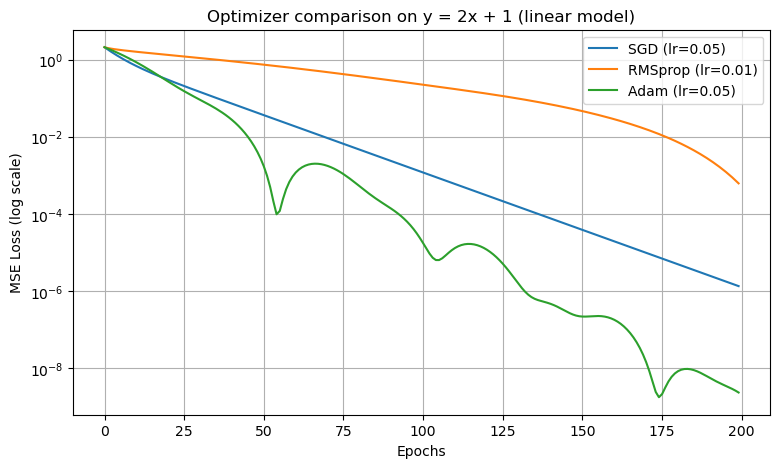

In [8]:
# -----------------------
# Plot losses
# -----------------------
plt.figure(figsize=(9,5))
plt.plot(sgd_losses, label='SGD (lr=0.05)')
plt.plot(rms_losses, label='RMSprop (lr=0.01)')
plt.plot(adam_losses, label='Adam (lr=0.05)')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss (log scale)')
plt.title('Optimizer comparison on y = 2x + 1 (linear model)')
plt.legend()
plt.grid(True)
plt.show()